In [1]:
# http://efavdb.com/machine-learning-for-facial-recognition-3/
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
import warnings
warnings.filterwarnings('ignore')

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [2]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [3]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                        random_state=42)
from sklearn.grid_search import GridSearchCV 
param_grid = {'svc__C': [10],
                      'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 6.84 s, sys: 256 ms, total: 7.09 s
Wall time: 5.08 s
{'svc__gamma': 0.005, 'svc__C': 10}


In [4]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

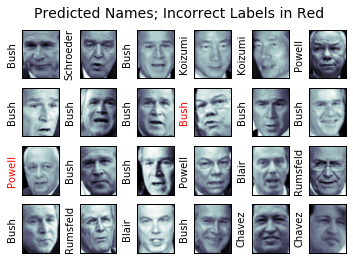

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red') 
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [6]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.82      0.90      0.86        68
  Donald Rumsfeld       0.92      0.71      0.80        31
    George W Bush       0.83      0.94      0.88       126
Gerhard Schroeder       0.95      0.78      0.86        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.93      0.88      0.90        42

      avg / total       0.87      0.87      0.86       337



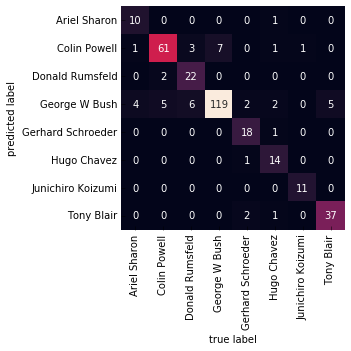

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=faces.target_names,
                    yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');